Link de envio da Prova
https://forms.gle/LkbEq3gaCpmswtCP6

In [ ]:
# Nome Aluno 1: Leão Pereira
# RA Aluno 1: 22200115

# Nome Aluno 2: Hézio Silva
# RA Aluno 2: 22204407

# Nome Aluno 3: João Gustavo
# RA Aluno 3:22205171

In [3]:
import matplotlib.pyplot as plt
import numpy as np


def display_images(images, labels, num_images=5):
    """
    Exibe uma seleção de imagens com rótulos.

    Parâmetros:
    - images (np.array): Array de imagens carregadas como arrays RGB.
    - labels (list): Lista de rótulos associados a cada imagem.
    - num_images (int): Número de imagens para exibir.
    """
    # Escolher o menor valor entre num_images e o número total de imagens disponíveis
    num_images = min(num_images, len(images))

    # Configurando as subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 10))  # Ajuste o tamanho conforme necessário

    for i, ax in enumerate(axes):
        # Mostra a imagem i no subplot correspondente
        ax.imshow(images[i])
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')  # Desativa as linhas de eixo

    plt.show()  # Exibe as imagens


# Carregar o arquivo .npz
data = np.load('dataset.npz')

# Acessar os arrays individuais
X_train = data['X_train']  # Carrega o array de imagens de treinamento
y_train = data['y_train']  # Carrega os rótulos de treinamento
X_val = data['X_validation']  # Carrega o array de imagens de validação
y_val = data['y_validation']  # Carrega os rótulos de validação
X_test = data['X_test']  # Carrega o array de imagens de teste
y_test = data['y_test']  # Carrega os rótulos de teste

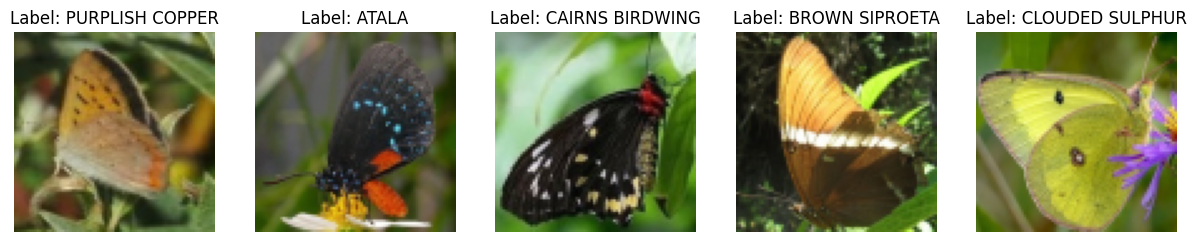

In [4]:
# Exibe as 5 primeiras imagens de treinamento
display_images(X_train, y_train, num_images=5)

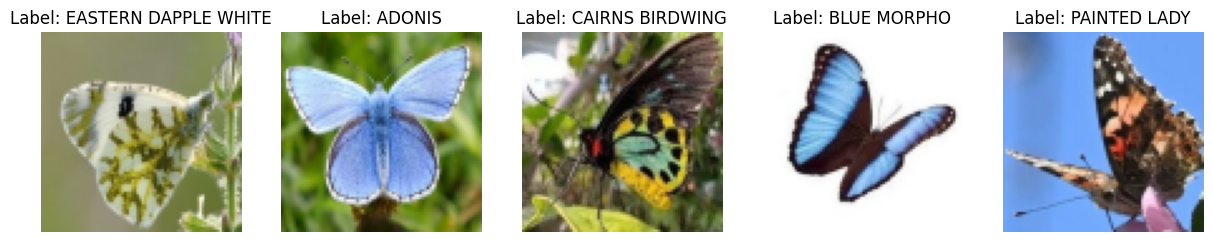

In [5]:
# Exibe as 5 primeiras imagens de teste
display_images(X_test, y_test, num_images=5)

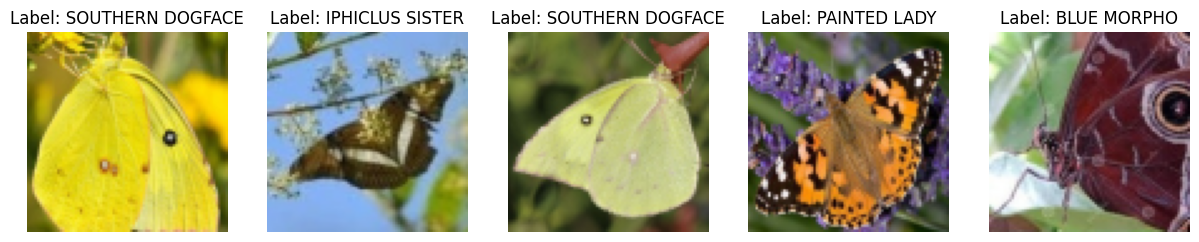

In [6]:
# Exibe as 5 primeiras imagens de validação
display_images(X_val, y_val, num_images=5)

In [7]:
# Informa que existem 450 imagens de teste
# Cada imagem com 224 x 224 pixels
X_test.shape

(450, 80, 80, 3)

# 1 - Redimencione as imagens de treinamento, validação e teste em 75x75 pixels

In [8]:
from skimage.transform import resize

# Redimensionar imagens de treinamento
X_train_resized = np.array([resize(img, (75, 75)) for img in X_train])

# Redimensionar imagens de validação
X_val_resized = np.array([resize(img, (75, 75)) for img in X_val])

# Redimensionar imagens de teste
X_test_resized = np.array([resize(img, (75, 75)) for img in X_test])


# 2 - Exiba as imagens de treinamento, validação e teste redimensionadas

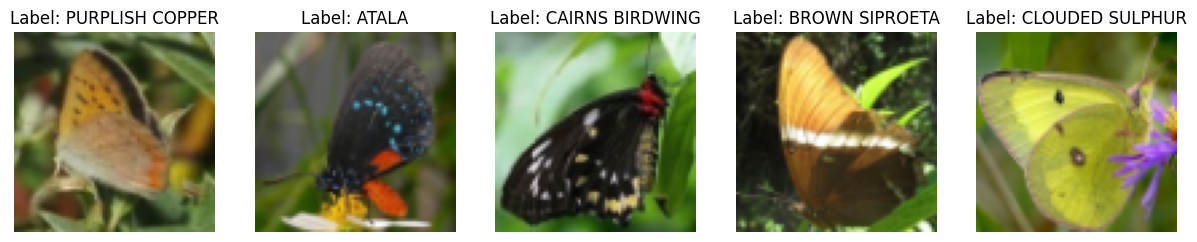

In [11]:
# Exibir imagens redimensionadas de treinamento
display_images(X_train_resized, y_train)

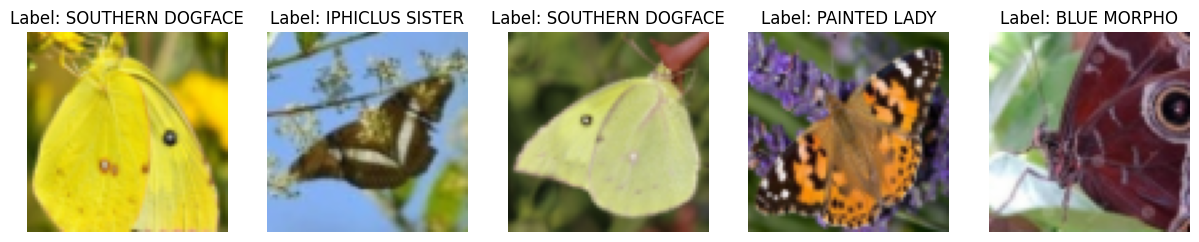

In [12]:
# Exibir imagens redimensionadas de validação
display_images(X_val_resized, y_val)

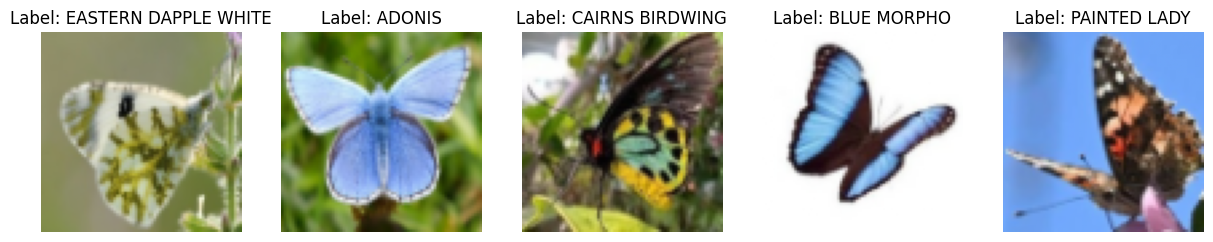

In [14]:
# Exibir imagens redimensionadas de teste
display_images(X_test_resized, y_test)

# 4 - Normalize os dados de treinamento, validação e teste

In [16]:
def normalize_images(images, mean=None, std=None):

    if mean is None:
        mean = np.mean(images)
    if std is None:
        std = np.std(images)
    images_normalized = (images - mean) / std
    return images_normalized, mean, std

# Normalizar os dados de treinamento
X_train_normalized, train_mean, train_std = normalize_images(X_train_resized)

# Normalizar os dados de validação usando a média e o desvio padrão dos dados de treinamento
X_val_normalized, _, _ = normalize_images(X_val_resized, mean=train_mean, std=train_std)

# Normalizar os dados de teste usando a média e o desvio padrão dos dados de treinamento
X_test_normalized, _, _ = normalize_images(X_test_resized, mean=train_mean, std=train_std)

# 5 - Preparação dos Rótulos (y) para Treinamento de Rede Neural
Atualmente, o array y contém apenas os nomes das imagens. Para o treinamento de uma rede neural, é necessário converter esses rótulos em um formato adequado. Transforme os rótulos de treinamento, validação e teste, que atualmente são apenas nomes das classes de cada imagem, para uma representação numérica ou categórica que possa ser utilizada por uma rede neural.

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Codificar os rótulos de treinamento
label_encoder = LabelEncoder()
integer_encoded_train = label_encoder.fit_transform(y_train)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded_train = integer_encoded_train.reshape(len(integer_encoded_train), 1)
y_train_onehot = onehot_encoder.fit_transform(integer_encoded_train)

# Codificar os rótulos de validação
integer_encoded_val = label_encoder.transform(y_val)
integer_encoded_val = integer_encoded_val.reshape(len(integer_encoded_val), 1)
y_val_onehot = onehot_encoder.transform(integer_encoded_val)

# Codificar os rótulos de teste
integer_encoded_test = label_encoder.transform(y_test)
integer_encoded_test = integer_encoded_test.reshape(len(integer_encoded_test), 1)
y_test_onehot = onehot_encoder.transform(integer_encoded_test)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 6 - Definição da Estrutura de Rede Neural Convolucional

Configure a seguinte arquitetura de rede neural convolucional (CNN) para tarefas de classificação:

1. **Primeira Camada Convolucional**: Utilize 60 filtros de tamanho 3x3.
2. **Primeira Camada de MaxPooling**: Aplique max pooling com um filtro de 2x2 para reduzir a dimensionalidade.

3. **Segunda Camada Convolucional**: Empregue 120 filtros de tamanho 3x3.
4. **Segunda Camada de MaxPooling**: Aplique max pooling com um filtro de 2x2.

5. **Terceira Camada Convolucional**: Utilize 240 filtros de tamanho 3x3.
6. **Terceira Camada de MaxPooling**: Aplique max pooling com um filtro de 2x2.

7. **Camada de Achatamento (Flatten)**: Transforme os mapas de características em um vetor unidimensional para as camadas densas.

8. **Camada Densa**: Adicione uma camada densa com 480 neurônios.
9. **Camada de Dropout**: Introduza um dropout de 15% para reduzir o overfitting, desativando aleatoriamente 15% dos neurônios durante o treinamento.

10. **Camada de Saída**: Configure a camada de saída para classificação, com um número de neurônios correspondente ao número de classes e ativação apropriada para classificação (e.g., softmax para multiclasse).

Esta arquitetura é projetada para capturar características hierárquicas das imagens através de múltiplas camadas convolucionais e de pooling, seguidas por camadas densas para a classificação final.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Definindo a arquitetura do modelo CNN
model = Sequential([
    Conv2D(60, (3, 3), activation='relu', input_shape=(75, 75, 3)),
    MaxPooling2D(2, 2),
    Conv2D(120, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(240, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(480, activation='relu'),
    Dropout(0.15),
    Dense(30, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 7 - Configuração de Callbacks para Otimização de Treinamento e Treinamento do Modelo

1. **Early Stopping**: Configure o *early stopping* para interromper o treinamento se a acurácia de validação não melhorar após 10 épocas consecutivas. Isso ajuda a prevenir o overfitting e reduz o tempo de treinamento desnecessário.

2. **Reduce Learning Rate on Plateau**: Implemente a redução do learning rate se a acurácia de validação não melhorar após 3 épocas. O fator de redução deve ser 0.3. Esse método ajusta o learning rate, permitindo refinamentos mais finos nos pesos da rede quando o treinamento parece estagnar.

3. **Treine o modelo**: Realize o treinamento do modelo usando os callbacks definidos por um total de 20 épocas. Salve as métricas ao longo do treinamento.


In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Definindo callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=3, verbose=1)

# Treinamento do modelo
history = model.fit(
    X_train_normalized, y_train_onehot,
    validation_data=(X_val_normalized, y_val_onehot),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
47/47 [==============================] - 42s 857ms/step - loss: 2.9314 - accuracy: 0.1460 - val_loss: 2.2984 - val_accuracy: 0.2967 - lr: 0.0010
Epoch 2/20
47/47 [==============================] - 40s 848ms/step - loss: 1.8667 - accuracy: 0.4207 - val_loss: 1.6512 - val_accuracy: 0.5167 - lr: 0.0010
Epoch 3/20
47/47 [==============================] - 40s 846ms/step - loss: 1.2391 - accuracy: 0.6147 - val_loss: 1.4649 - val_accuracy: 0.5667 - lr: 0.0010
Epoch 4/20
47/47 [==============================] - 40s 862ms/step - loss: 0.8256 - accuracy: 0.7293 - val_loss: 1.3158 - val_accuracy: 0.5767 - lr: 0.0010
Epoch 5/20
47/47 [==============================] - 39s 823ms/step - loss: 0.5678 - accuracy: 0.8127 - val_loss: 1.4223 - val_accuracy: 0.6133 - lr: 0.0010
Epoch 6/20
47/47 [==============================] - 39s 823ms/step - loss: 0.3107 - accuracy: 0.8967 - val_loss: 1.4965 - val_accuracy: 0.6133 - lr: 0.0010
Epoch 7/20
47/47 [==============================] - 38s 808ms/st

# 8 - Visualização de Métricas de Desempenho Durante o Treinamento
Desenvolva um código que gere um gráfico exibindo as curvas de perda (loss) e acurácia tanto para o treinamento quanto para a validação ao longo das épocas. Este gráfico permitirá uma análise visual clara da evolução das métricas, facilitando a identificação de tendências como overfitting ou underfitting e a eficácia dos ajustes realizados nos parâmetros de aprendizado.



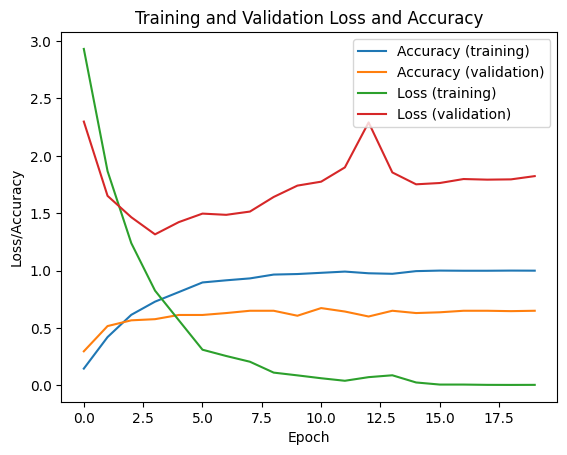

In [28]:
# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy (training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation)')
plt.plot(history.history['loss'], label='Loss (training)')
plt.plot(history.history['val_loss'], label='Loss (validation)')
plt.title('Training and Validation Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# 9 - Exiba a acurácia, precisão, recall e F1 score nos dados de treinamento

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Avaliação do modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test_onehot)
print("Test Accuracy:", test_accuracy)

# Predições e matriz de confusão
y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_onehot, axis=1)

print(classification_report(y_true, y_pred_classes))

15/15 [==============================] - 4s 229ms/step - loss: 1.6063 - accuracy: 0.6911
Test Accuracy: 0.6911110877990723
15/15 [==============================] - 4s 259ms/step
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       1.00      0.67      0.80        15
           2       0.57      0.53      0.55        15
           3       0.82      0.60      0.69        15
           4       0.79      0.73      0.76        15
           5       0.69      0.73      0.71        15
           6       0.88      0.93      0.90        15
           7       0.65      0.73      0.69        15
           8       0.69      0.60      0.64        15
           9       0.28      0.33      0.30        15
          10       0.80      0.53      0.64        15
          11       0.62      0.67      0.65        15
          12       0.87      0.87      0.87        15
          13       0.77      0.67      0.71        15
          1

# 10 - Faça uma matriz de confusão com gráfico de calor
Não precisa exibir com o nome das borboletas

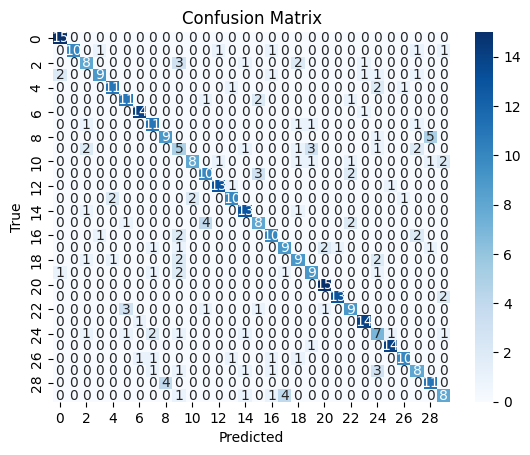

array([[15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 10,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1],
       [ 0,  0,  8,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  1,  0,
         0,  0,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  1,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 11,  

In [33]:
conf_mat = confusion_matrix(y_true, y_pred_classes)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
conf_mat